<center>
<h2>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h2>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2020</h3>
<h4>Ciencia de Datos aplicada en la distribución de Energía Eléctrica - Preprocesamiento</h4>
</center>
</left>
<h4>Mentor: Martín Hunziker</h4>
</left>

### Introducción

En la siguiente notebook, implementaremos los pasos necesarios para el preprocesamiento de una de las tablas de la Base de Datos Geográfica de la Distribuidora (BDGD). Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import fiona

from IPython.display import Image


In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

### Primera Aproximación a los Datos

Vamos a trabajar con datos geográficos de la Distribuidora Energisa Nova Friburgo, ENF, que presta servicio de distribución de energía eléctrica en la ciudad de Nova Friburgo en las sierras del estado de Río de Janeiro.

A continuación podemos observar el área de concesión de la distribuidora:


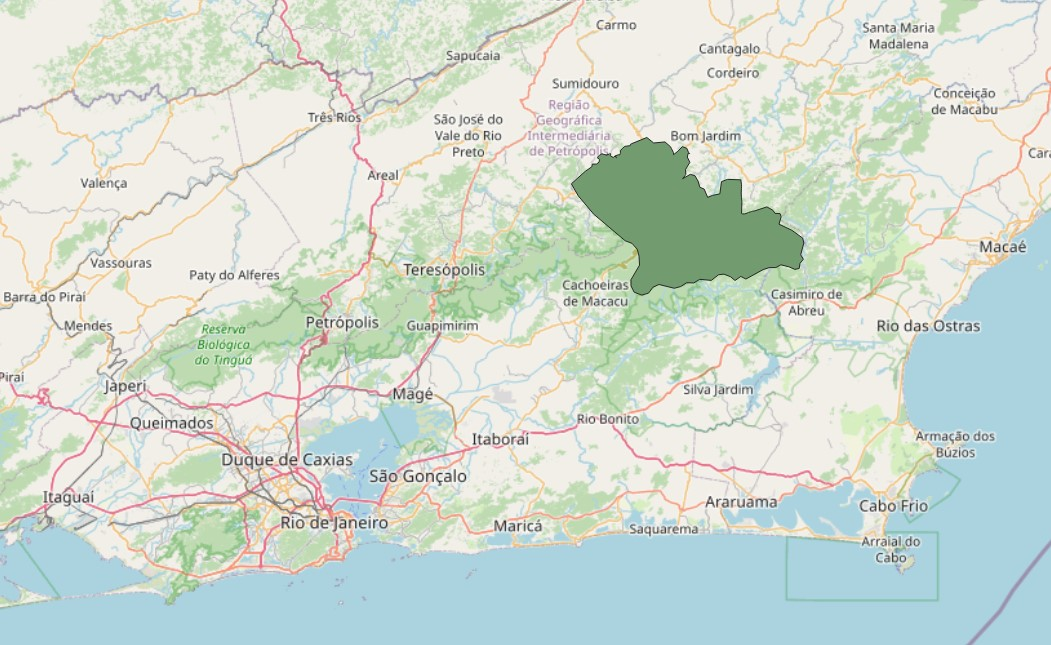

In [4]:
Image(filename='./docs/ENF_mapa.jpg') 

La **BDGD** es una base que anualmente las distribuidoras envían al regulador (ANEEL) y es utilizada para diversos estudios técnicos / regulatórios.

La BDGD contiene información detallada de todos los activos y clientes de la distribuidora. en la imagen a continuación observamos las redes de media tensión SSDMT, los transformadores de media tensión a baja tensión UNTRD y los usuarios de baja tensión UCBT de la subestación: Subetacao de Julius ARP

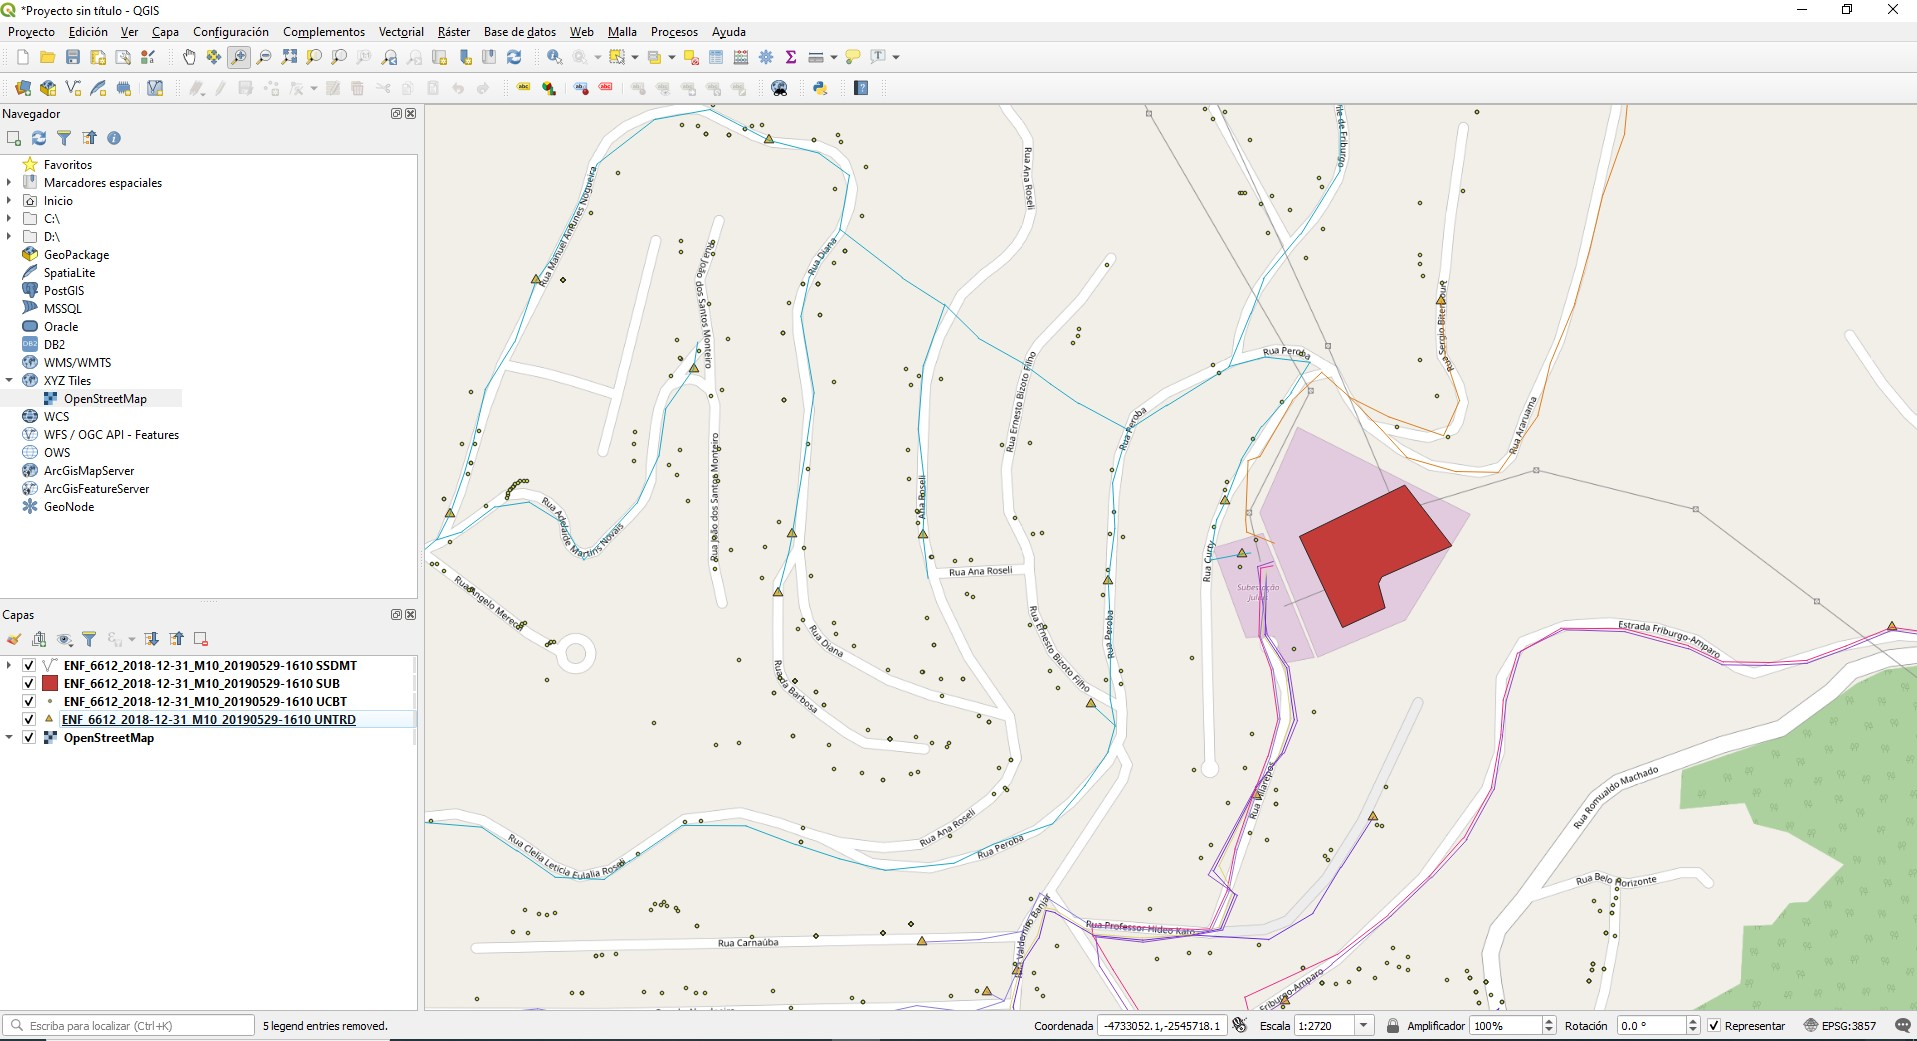

In [5]:
Image(filename='./docs/SEJuliusARP_mapa.jpg') 

Como las informaciones están **georeferenciadas** podemos buscar los activos en el Street View de Google y ver una foto de los mismos. En la imagen a continuación pueden observar una imagen del ingreso a la SE

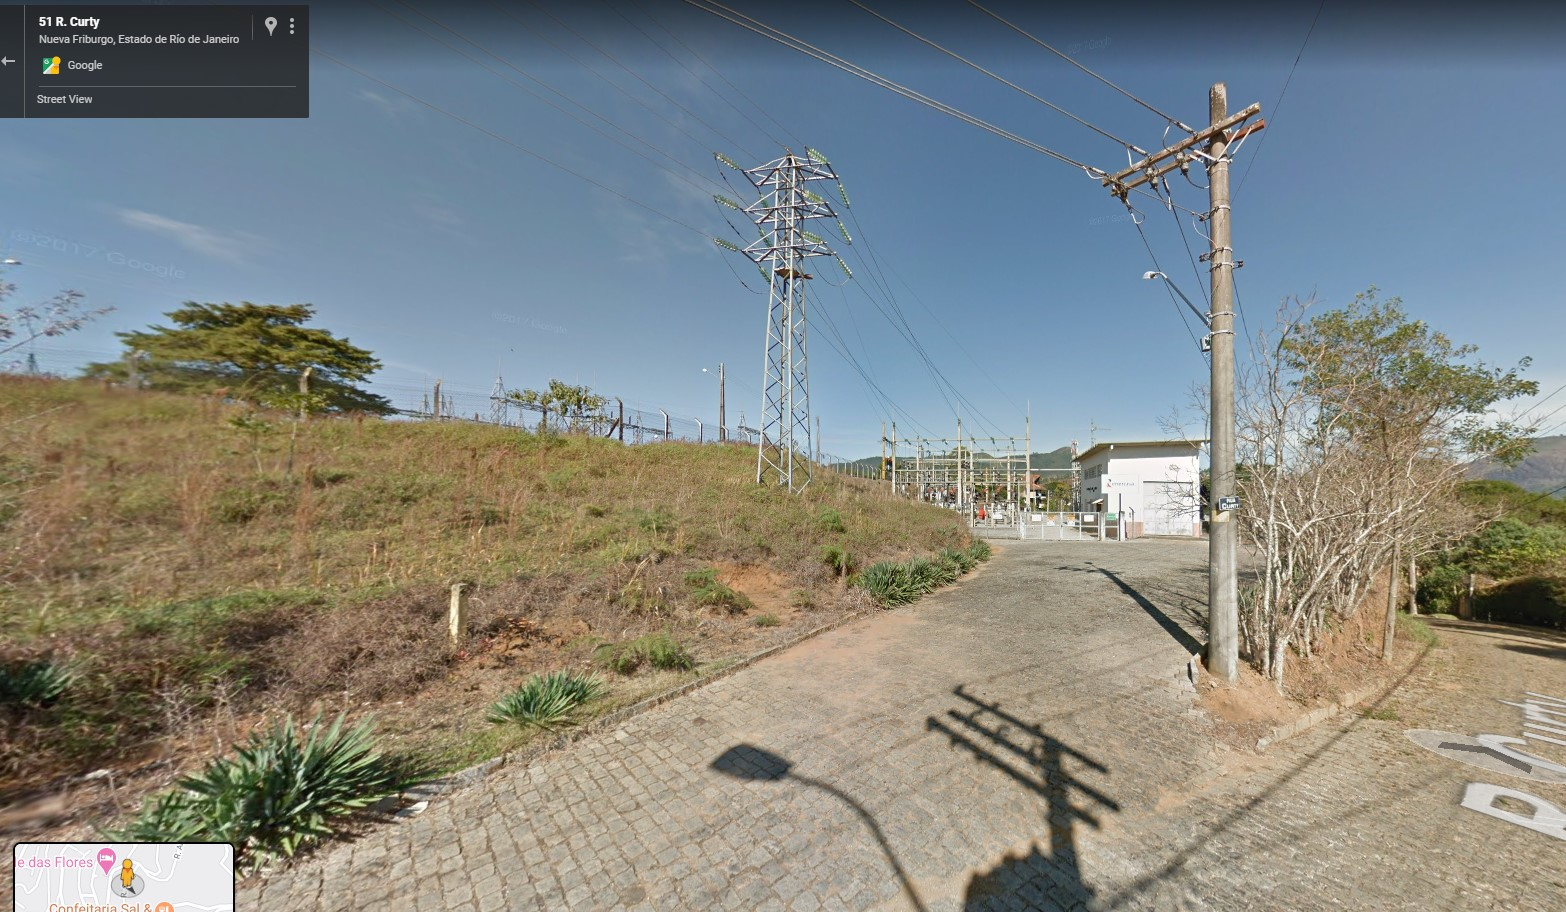

In [9]:
Image(filename='./docs/SEJuliusARP_StrVw.jpg') 

Carguemos los datos en nuestra notebook utilizando la librería **Geopandas**.

In [12]:
# Mostramos la lista de layers (capas) que tiene la base de datos

path_data = './Dataset/'
path_base = path_data+'ENF_6612_2018-12-31_M10_20190529-1610.gdb'

print(fiona.listlayers(path_base))

['BAR', 'BASE', 'BAY', 'BE', 'CTAT', 'CTMT', 'EP', 'EQCR', 'EQME', 'EQRE', 'EQSE', 'EQSIAT', 'EQTRD', 'EQTRM', 'EQTRS', 'EQTRSX', 'INDGER', 'PIP', 'PNT', 'PT', 'RAMLIG', 'SEGCON', 'ARAT', 'CONJ', 'PONNOT', 'SSDAT', 'SSDBT', 'SSDMT', 'SUB', 'UCAT', 'UCBT', 'UCMT', 'UGAT', 'UGBT', 'UGMT', 'UNCRAT', 'UNCRBT', 'UNCRMT', 'UNREAT', 'UNREMT', 'UNSEAT', 'UNSEBT', 'UNSEMT', 'UNTRD', 'UNTRS']


Cada una de las layers del archivo es un tabla independiente. La documentación, **Módulo10_Revisão0.pdf** (disponible en la carpeta docs), contiene la descripción de cada uno de los campos de cada una de las tablas de la BDGD


En este primer práctico trabajaremos con la tabla de los consumidores de baja tensión, **tabla UCBT**.

Veamos las caracteristicas principales de UCBT segun la documentación:

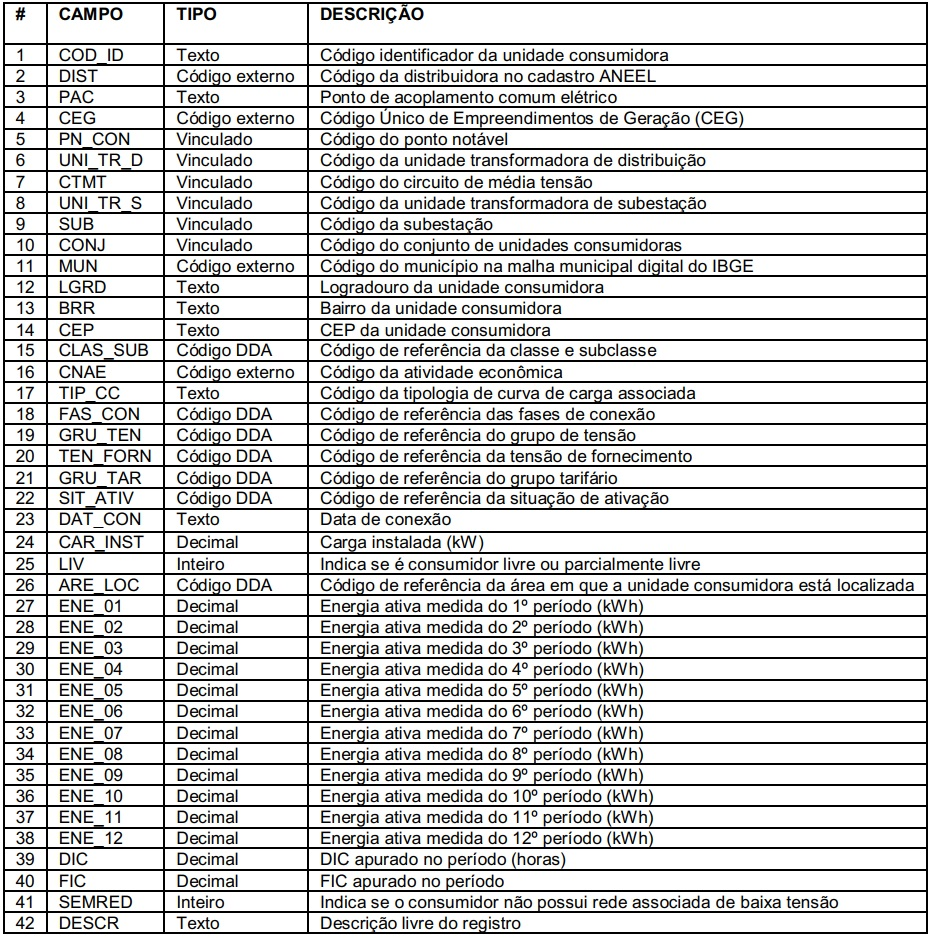

In [24]:
Image(filename='./docs/ucbt_features.jpg') 

In [13]:
# Cargamos la layer (tabla geográfica) UCBT (Consumidores de Baja Tensión) una variable

_ds = gpd.read_file(path_base, driver='FileGDB', layer='UCBT')
_ds.head()

,DIST,PAC,PN_CON,UNI_TR_D,CTMT,UNI_TR_S,SUB,CONJ,MUN,BRR,CEP,CLAS_SUB,CNAE,TIP_CC,FAS_CON,GRU_TEN,TEN_FORN,GRU_TAR,SIT_ATIV,DAT_CON,CAR_INST,LIV,ENE_01,ENE_02,ENE_03,ENE_04,ENE_05,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12,DIC,FIC,SEMRED,DESCR,ARE_LOC,geometry
0,6612,77407900752992400BT,27148349,26876319,27117483,27707534,27335513,15616,3303401,LUMIAR,28610000,RE1,99999,RES-Tipo8,A,BT,15,B1,AT,19/09/1997,6.0,0,343.0,325.0,265.0,193.0,153.0,122.0,150.0,150.0,143.0,139.0,166.0,168.0,31.59,9.0,1,,UB,POINT (-42.33951 -22.31468)
1,6612,77580298752558226BT,27156584,26876397,27117483,27707534,27335513,15616,3303401,AREA RURAL,28610000,RE1,99999,RES-Tipo8,A,BT,15,B1,AT,19/09/1997,6.0,0,115.0,133.0,110.0,94.0,112.0,111.0,112.0,126.0,118.0,135.0,100.0,83.0,2.32,3.0,1,,UB,POINT (-42.32204 -22.35359)
2,6612,77401136752897220BT,27161605,26876353,27117483,27707534,27335513,15616,3303401,S P DA SERRA,28610000,RE1,99999,RES-Tipo8,BC,BT,15,B1,AT,19/09/1997,6.0,0,96.0,107.0,99.0,99.0,126.0,108.0,113.0,104.0,92.0,99.0,110.0,94.0,38.01,10.0,1,,NU,POINT (-42.34000 -22.32328)
3,6612,75220000753924000BT,27145426,26877848,27117490,27707625,27335509,16069,3303401,SAO GERALDO,28610000,RE1,99999,RES-Tipo8,B,BT,15,B1,AT,10/05/1990,6.0,0,216.0,202.0,199.0,179.0,231.0,204.0,217.0,205.0,184.0,220.0,197.0,197.0,1.81,3.0,1,,UB,POINT (-42.55320 -22.23394)
4,6612,75263876752971567BT,27138403,26879884,80345445,80345241,27335511,16070,3303401,OLARIA,28610000,RE1,99999,RES-Tipo8,B,BT,15,B1,AT,31/07/1988,6.0,0,223.0,128.0,116.0,221.0,114.0,72.0,73.0,163.0,146.0,114.0,139.0,227.0,1.55,3.0,1,,UB,POINT (-42.54744 -22.31984)


Las variables `DIC`= Duración de la Interrupción por consumidor [h] y `FIC`= Cantidad de Interrupciones por consumidor constituyen nuestros objetivos de predicción.

In [15]:
# Obtenemos la cantidad de filas y columnas del Dataset Original
_shape = _ds.shape
print("Nuestro Dataset original tiene", _shape[0], "filas y", _shape[1],"columnas.")

Nuestro Dataset original tiene 108346 filas y 40 columnas.


In [16]:
# Observamos algunos registros más
_ds.head(20)

,DIST,PAC,PN_CON,UNI_TR_D,CTMT,UNI_TR_S,SUB,CONJ,MUN,BRR,CEP,CLAS_SUB,CNAE,TIP_CC,FAS_CON,GRU_TEN,TEN_FORN,GRU_TAR,SIT_ATIV,DAT_CON,CAR_INST,LIV,ENE_01,ENE_02,ENE_03,ENE_04,ENE_05,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12,DIC,FIC,SEMRED,DESCR,ARE_LOC,geometry
0,6612,77407900752992400BT,27148349,26876319,27117483,27707534,27335513,15616,3303401,LUMIAR,28610000,RE1,99999,RES-Tipo8,A,BT,15,B1,AT,19/09/1997,6.000,0,343.0,325.0,265.0,193.0,153.0,122.0,150.0,150.0,143.0,139.0,166.0,168.0,31.59,9.0,1,,UB,POINT (-42.33951 -22.31468)
1,6612,77580298752558226BT,27156584,26876397,27117483,27707534,27335513,15616,3303401,AREA RURAL,28610000,RE1,99999,RES-Tipo8,A,BT,15,B1,AT,19/09/1997,6.000,0,115.0,133.0,110.0,94.0,112.0,111.0,112.0,126.0,118.0,135.0,100.0,83.0,2.32,3.0,1,,UB,POINT (-42.32204 -22.35359)
2,6612,77401136752897220BT,27161605,26876353,27117483,27707534,27335513,15616,3303401,S P DA SERRA,28610000,RE1,99999,RES-Tipo8,BC,BT,15,B1,AT,19/09/1997,6.000,0,96.0,107.0,99.0,99.0,126.0,108.0,113.0,104.0,92.0,99.0,110.0,94.0,38.01,10.0,1,,NU,POINT (-42.34000 -22.32328)
3,6612,75220000753924000BT,27145426,26877848,27117490,27707625,27335509,16069,3303401,SAO GERALDO,28610000,RE1,99999,RES-Tipo8,B,BT,15,B1,AT,10/05/1990,6.000,0,216.0,202.0,199.0,179.0,231.0,204.0,217.0,205.0,184.0,220.0,197.0,197.0,1.81,3.0,1,,UB,POINT (-42.55320 -22.23394)
4,6612,75263876752971567BT,27138403,26879884,80345445,80345241,27335511,16070,3303401,OLARIA,28610000,RE1,99999,RES-Tipo8,B,BT,15,B1,AT,31/07/1988,6.000,0,223.0,128.0,116.0,221.0,114.0,72.0,73.0,163.0,146.0,114.0,139.0,227.0,1.55,3.0,1,,UB,POINT (-42.54744 -22.31984)
5,6612,75262279752969566BT,27138337,26879884,80345445,80345241,27335511,16070,3303401,OLARIA,28610000,RE1,99999,RES-Tipo8,ABC,BT,15,B1,AT,18/07/1996,24.196,0,398.0,460.0,398.0,417.0,445.0,423.0,466.0,386.0,448.0,447.0,490.0,473.0,1.55,3.0,1,,UB,POINT (-42.54759 -22.32003)
6,6612,75262279752969566BT,27138337,26879884,80345445,80345241,27335511,16070,3303401,OLARIA,28610000,CO9,85201,COM-Tipo7,ABC,BT,15,B3,AT,01/09/1994,18.500,0,368.0,368.0,371.0,342.0,353.0,331.0,355.0,330.0,304.0,324.0,296.0,324.0,1.55,3.0,1,,UB,POINT (-42.54759 -22.32003)
7,6612,75261222752970346BT,27138337,26879884,80345445,80345241,27335511,16070,3303401,CONEGO,28610000,RE1,99999,RES-Tipo8,C,BT,15,B1,AT,13/01/1994,6.000,0,80.0,103.0,132.0,126.0,109.0,111.0,84.0,141.0,89.0,86.0,93.0,91.0,1.55,3.0,1,,UB,POINT (-42.54770 -22.31996)
8,6612,75259676752971877BT,27138104,26879884,80345445,80345241,27335511,16070,3303401,OLARIA,28610000,RE1,99999,RES-Tipo8,ABC,BT,15,B1,AT,31/07/1988,24.196,0,634.0,624.0,574.0,629.0,539.0,487.0,478.0,524.0,546.0,575.0,597.0,674.0,1.55,3.0,1,,UB,POINT (-42.54785 -22.31982)
9,6612,75259281752972311BT,27138104,26879884,80345445,80345241,27335511,16070,3303401,CONEGO,28610000,RE1,99999,RES-Tipo8,C,BT,15,B1,AT,31/07/1988,6.000,0,114.0,177.0,170.0,106.0,269.0,363.0,326.0,310.0,242.0,222.0,221.0,246.0,1.55,3.0,1,,UB,POINT (-42.54789 -22.31978)


In [17]:
# Obtenemos los tipos de datos por columnas
data_types = _ds.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
DIST,int64
PAC,object
PN_CON,object
UNI_TR_D,object
CTMT,object
UNI_TR_S,object
SUB,object
CONJ,int64
MUN,object


Podemos ver que existen dos variables que no se corresponden al tipo de dato especificado:

    - DIST es el codigo de la distribuidora
    - LIV es un codigo binario
    - CONJ es un identificador categorico pero fue interpretado como numero
    - DAT_CON es una fecha pero se reconoce como texto
    

In [18]:
# Convertimos los identificadores de los conjuntos a strings
_ds['DIST'] = _ds.DIST.astype(str)
_ds['LIV'] = _ds.LIV.astype(str)
_ds['CONJ'] = _ds.CONJ.astype(str)
_ds['DAT_CON'] = pd.to_datetime(_ds.DAT_CON, dayfirst=True, format='%d/%m/%Y')

In [19]:
# Observamos los campos que tienen tipo 'Objeto'
_ds.dtypes[_ds.dtypes == 'object']

DIST        object
PAC         object
PN_CON      object
UNI_TR_D    object
CTMT        object
UNI_TR_S    object
SUB         object
CONJ        object
MUN         object
BRR         object
CEP         object
CLAS_SUB    object
CNAE        object
TIP_CC      object
FAS_CON     object
GRU_TEN     object
TEN_FORN    object
GRU_TAR     object
SIT_ATIV    object
LIV         object
DESCR       object
ARE_LOC     object
dtype: object

In [20]:
# Clasificar columnas en categoricas y numericas
cat_ft = _ds.columns[_ds.dtypes == 'object']
num_ft = _ds.columns[_ds.dtypes != 'object']

In [21]:
# Descripción de las vairables numericas
_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
CAR_INST,108346.0,7.975656,29.404833,0.0,6.00,6.00,8.50,8500.00
ENE_01,108346.0,184.808041,3427.345085,-1215.0,56.00,117.00,186.00,1085849.00
ENE_02,108346.0,185.629926,3102.664104,-1045.0,57.00,117.00,187.00,980767.00
ENE_03,108346.0,193.895603,3430.466592,-1899.0,59.00,122.00,194.00,1085849.00
ENE_04,108346.0,187.665784,3132.614832,-997.0,58.00,118.00,189.00,988788.00
ENE_05,108346.0,191.351384,3233.007350,-11868.0,58.00,122.00,198.00,1022096.00
ENE_06,108346.0,188.751195,3129.160704,-438.0,56.00,122.00,199.00,989289.00
ENE_07,108346.0,189.215356,3241.481055,-1161.0,56.00,120.00,197.00,1022276.00
ENE_08,108346.0,186.151330,3231.507850,-1834.0,55.00,119.00,194.00,1022276.00
ENE_09,108346.0,177.181456,3125.092553,-581.0,53.00,113.00,184.00,988667.00


Tenemos casos de energia negativa lo cual inicialmente parece no ser fisiamente posible, sin embargo pueden existir compensaciones comerciales por errores de lectura.

In [22]:
_ds.describe(include='O').T

,count,unique,top,freq
DIST,108346,1,6612,108346
PAC,108346,55532,75364036753377719BT,124
PN_CON,108346,18377,27134304,170
UNI_TR_D,108346,3533,26877243,401
CTMT,108346,31,27117485,8905
UNI_TR_S,108346,8,27707861,31602
SUB,108346,7,27335511,38968
CONJ,108346,6,16070,36402
MUN,108346,2,3303401,107680
BRR,108346,184,CENTRO,22761


Si queremos ver en detalles la cantidad de valores en cada categorica podemos usar value_counts().

Veamos la cantidad de registros por municipio.

In [23]:
_ds.MUN.value_counts()

3303401    107680
3300506       666
Name: MUN, dtype: int64

In [24]:
# Observamos los valores posibles del campo "ARE_LOC"
_arr = _ds['ARE_LOC'].unique()
_arr.sort()
_arr[::-1]

array(['UB', 'NU', '0'], dtype=object)

In [25]:
# Observamos los valores posibles del campo "Tipo_CC" Tipo de cuerva de carga
_arr = _ds['TIP_CC'].unique()
_arr

array(['RES-Tipo8', 'COM-Tipo7', 'RUR-Tipo7', 'SP-Tipo2', 'IND-Tipo9',
       'RUR-Tipo8', 'RES-Tipo6', 'RES-Tipo7', 'COM-Tipo5', 'RUR-Tipo6',
       'IND-Tipo7', 'COM-Tipo6', 'SP-Tipo1', 'IND-Tipo8', 'RES-Tipo10',
       'COM-Tipo10', 'SP-Tipo4', 'RUR-Tipo10', 'SP-Tipo5', 'RES-Tipo1',
       'IND-Tipo1', 'RES-Tipo2', 'COM-Tipo1', 'RES-Tipo3', 'RES-Tipo4',
       'RES-Tipo5', 'COM-Tipo4', 'RES-Tipo9', 'IP-Tipo1', 'COM-Tipo9',
       'RUR-Tipo9', 'IND-Tipo10', 'SP-Tipo3', 'COM-Tipo8', 'SP-Tipo6',
       'SP-Tipo7', 'SP-Tipo8', 'SP-Tipo10', 'RUR-Tipo1', 'COM-Tipo01',
       'IND-Tipo2', 'RUR-Tipo2', 'IND-Tipo3', 'IND-Tipo4', 'IND-Tipo5',
       'RUR-Tipo3', 'COM-Tipo2', 'RUR-Tipo4', 'RUR-Tipo5', 'COM-Tipo3',
       'IND-Tipo6'], dtype=object)

## Distribución estadística

In [26]:
# Analizamos la distribución del FIC 
_ds['FIC'].value_counts().sort_index().head(10)

0.0    19430
1.0    16638
2.0    15850
3.0    15207
4.0    10047
5.0     6439
6.0     5593
7.0     3934
8.0     2848
9.0     3488
Name: FIC, dtype: int64

In [27]:
# Analizamos la distribución del DIC 
_ds['DIC'].value_counts().sort_index().head(10)

0.00    19430
0.05      136
0.06      501
0.07      276
0.08       60
0.10       14
0.11        1
0.12      407
0.13     1096
0.15      800
Name: DIC, dtype: int64

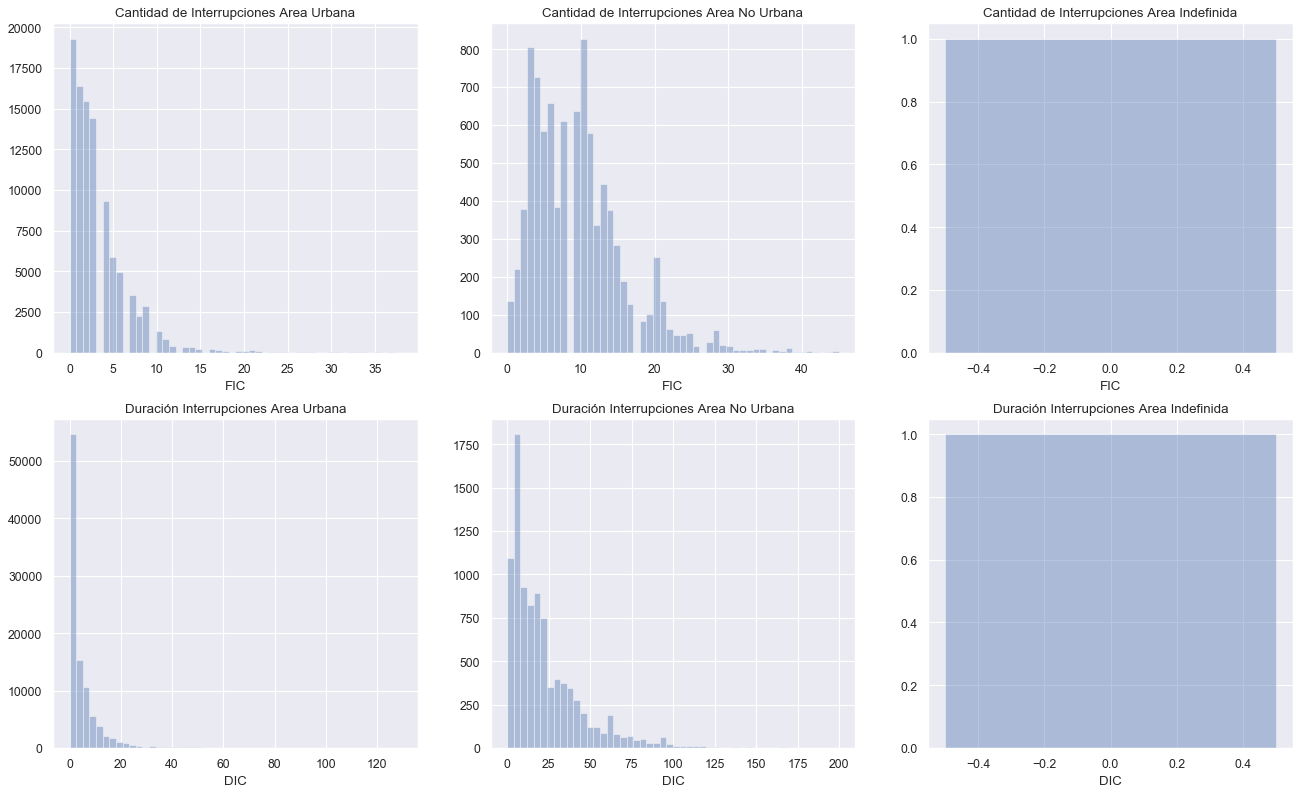

In [28]:
# Analizamos la distribución de los indicadores
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(20, 12), dpi=80)
       
subplot(2,3,1)
title('Cantidad de Interrupciones Area Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['FIC'],kde=False)
subplot(2,3,2)
title('Cantidad de Interrupciones Area No Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['FIC'],kde=False)
subplot(2,3,3)
title('Cantidad de Interrupciones Area Indefinida')
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['FIC'],kde=False)
subplot(2,3,4)
title('Duración Interrupciones Area Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['DIC'],kde=False)
subplot(2,3,5)
title('Duración Interrupciones Area No Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['DIC'],kde=False)
subplot(2,3,6)
title('Duración Interrupciones Area Indefinida')
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['DIC'],kde=False)


In [29]:
# Observamos que existe solo 1 usuario con la clasificación Urbana -  no Urbana no definida. Verificamos
_ds.groupby('ARE_LOC').count()['DIST']

ARE_LOC
0         1
NU     9308
UB    99037
Name: DIST, dtype: int64

### Agrupando features

In [30]:
_ds['ENE_MED'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].mean(axis=1)
_ds['ENE_STD'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].std(axis=1)
_ds['ENE_MAX'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].max(axis=1)

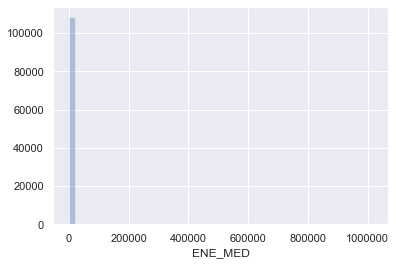

In [32]:
# Distribucion del consumo medio
sns.distplot(_ds.ENE_MED, kde=False)

Podemos ver que todos los valores estan concentrados en la parte baja del rango


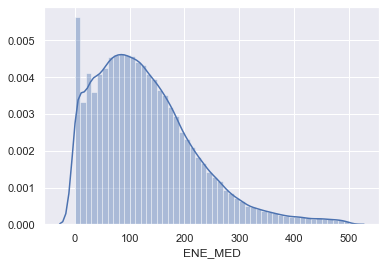

In [33]:
# Creemos un filtro para quedarnos con los valores en un rango entre 0 y 500

mask = (_ds.ENE_MED < 500) & (_ds.ENE_MED > 0)
sns.distplot(_ds.ENE_MED[mask])

### Gráficos de interacción entre variables

Ademas de la distribución también podemos graficar la relación entre las variables y la salida, o entre ellas.

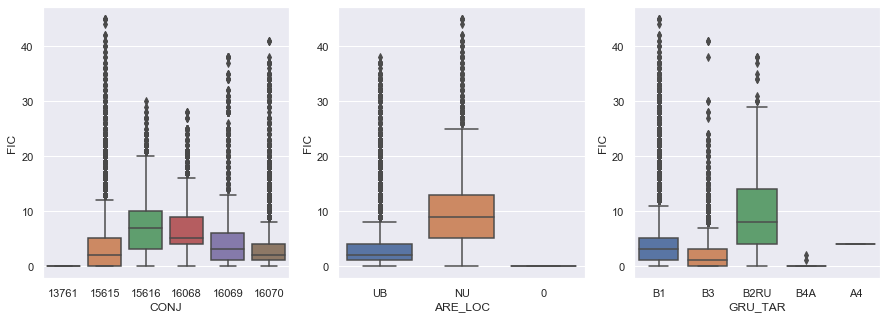

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x= 'CONJ', y='FIC', data=_ds)

plt.subplot(1,3,2)
sns.boxplot(x= 'ARE_LOC', y='FIC', data=_ds)

plt.subplot(1,3,3)
sns.boxplot(x= 'GRU_TAR', y='FIC', data=_ds)

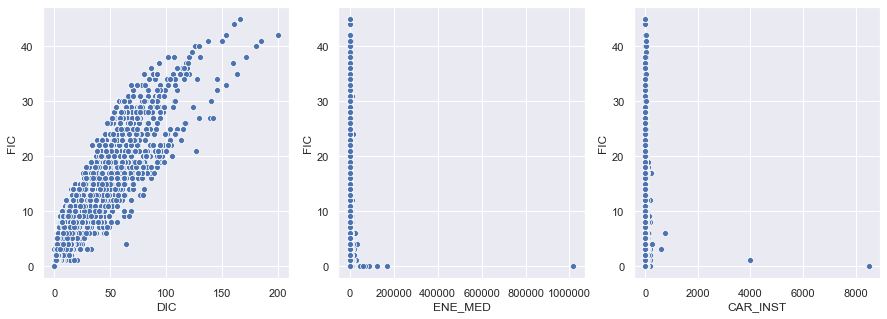

In [35]:
# Para relacionar variables numericas podemos usar un ScatterPlot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x= 'DIC', y='FIC', data=_ds)

plt.subplot(1,3,2)
sns.scatterplot(x= 'ENE_MED', y='FIC', data=_ds)

plt.subplot(1,3,3)
sns.scatterplot(x= 'CAR_INST', y='FIC', data=_ds)

Una manera rápida de verificar la relación entre variables es calcular la correlación que se puede visualizar en un heatmap.

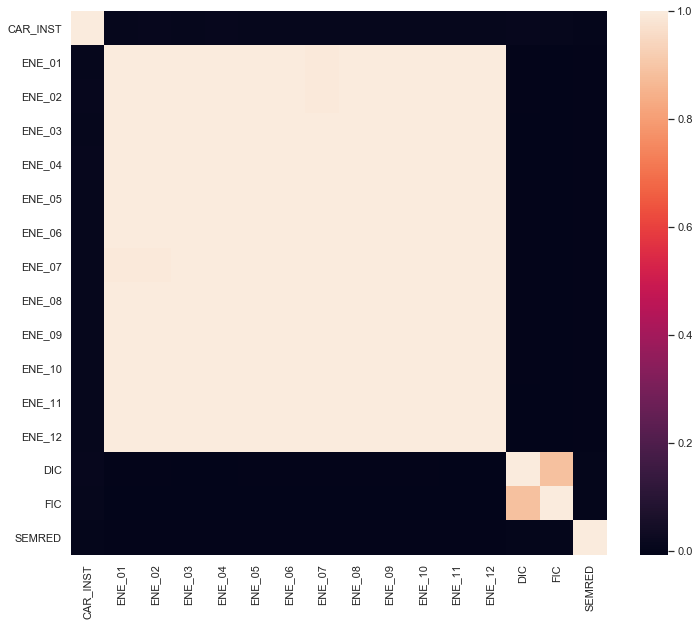

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(_ds[num_ft].corr())

Es posible chequear la correspondencia entre variables categoricas haciendo un crosstab para verificar que una categoria no sea una simple subdivision de otra.

In [38]:
# Relacion entre variables categoricas
pd.crosstab(_ds.CONJ, _ds.MUN)

MUN,3300506,3303401
CONJ,,
13761,0,1
15615,0,33105
15616,375,7486
16068,0,3698
16069,287,26992
16070,4,36398
